Script to analyse the Quiz of the Week data from the CSV. Specifically it creates a scatter plot with all the results, a bar chart with the frequencies, and also a statistical analysis of each denominator.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# File name
INPUT_FILE_NAME = 'qotw.csv'

# Existing columns
DATE = 'date'
NUMERATOR = 'numerator'
DENOMINATOR = 'denominator'

# New column
WEIGHTED = 'weighted'

In [3]:
data = pd.read_csv(INPUT_FILE_NAME)
data[WEIGHTED] = data[NUMERATOR]/data[DENOMINATOR]
data[DATE] = pd.to_datetime(data[DATE], format='%Y-%m-%d')

groups = data.groupby(by=DENOMINATOR)

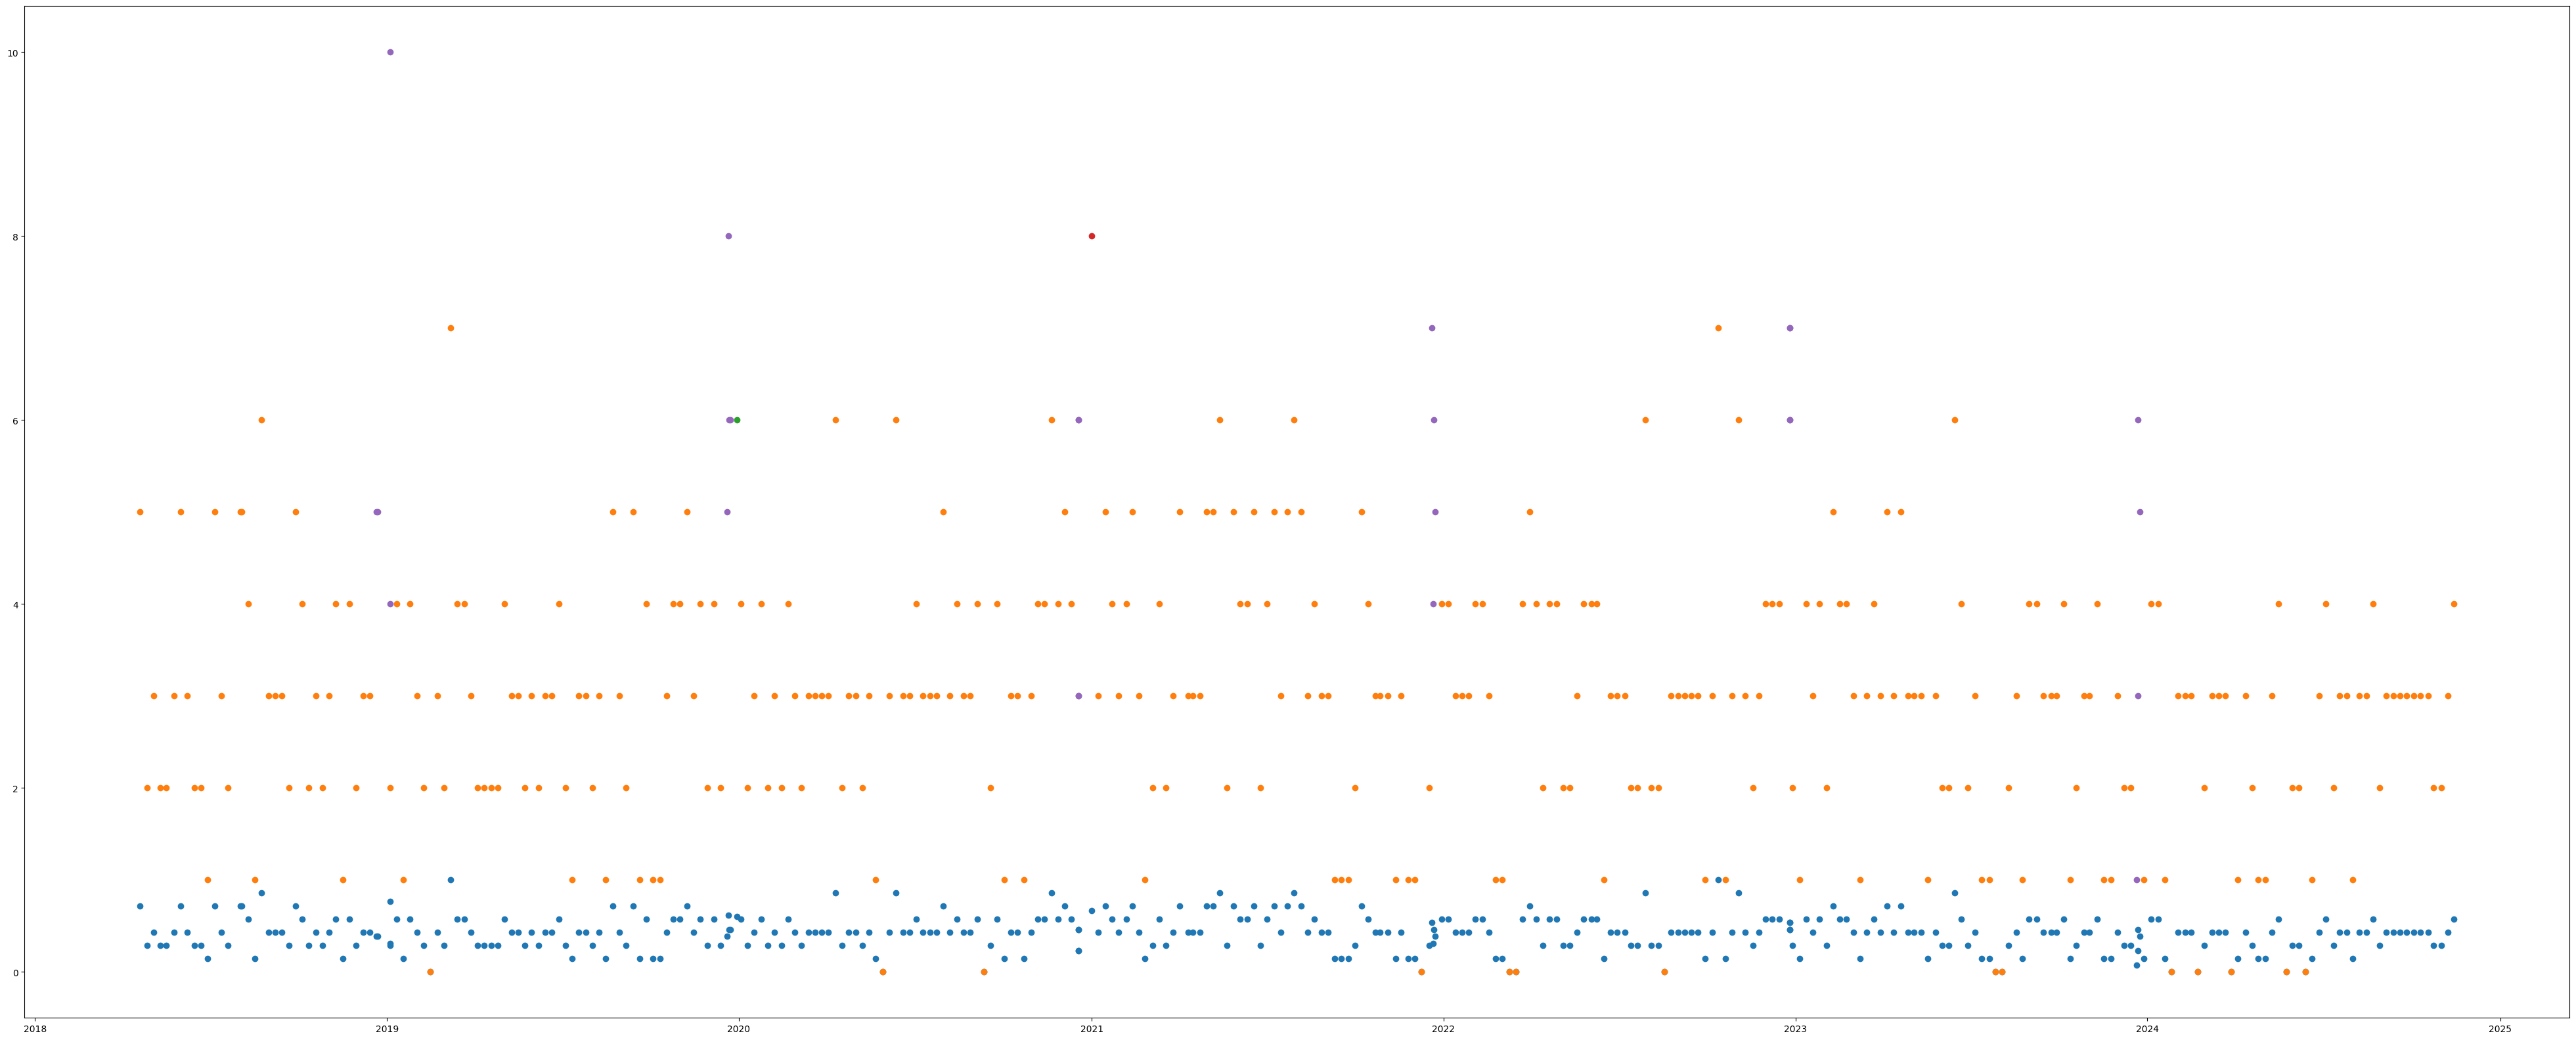

In [4]:
plt.figure(1, figsize=(50, 20))
plt.scatter(data[DATE], data[WEIGHTED])
cols = groups.indices
analysis = pd.DataFrame()
for i in cols:
    group = groups.get_group(i)
    analysis[i] = group[NUMERATOR].describe()
    plt.scatter(group[DATE], group[NUMERATOR])
analysis = analysis.transpose()
analysis.index.names = ['denominator']

In [5]:
plt.savefig('../output/scatter.png')

analysis.to_csv('../output/analysistable.csv')

<Figure size 640x480 with 0 Axes>

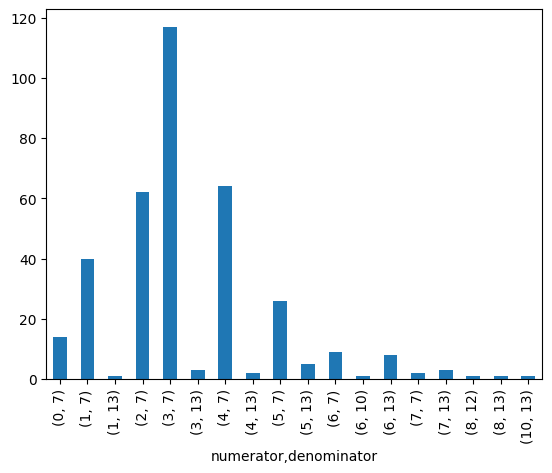

In [6]:
counts = data.value_counts(subset=[NUMERATOR, DENOMINATOR], sort=False, dropna=False)
counts_bar_fig = plt.figure(2)
counts.plot.bar()
counts_bar_fig.savefig('../output/counts_bar.png')